# Projet 6 : Classifiez automatiquement des biens de consommations

In [1]:
# Chargement modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from IPython.display import display
from datetime import date
pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 200)

## 1- Lecture des fichiers de data

In [2]:
data_flpk = pd.read_csv(r'flipkart_com-ecommerce_sample_1050.csv')

In [3]:
data_flpk

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [4]:
# Analyse des types
data_flpk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

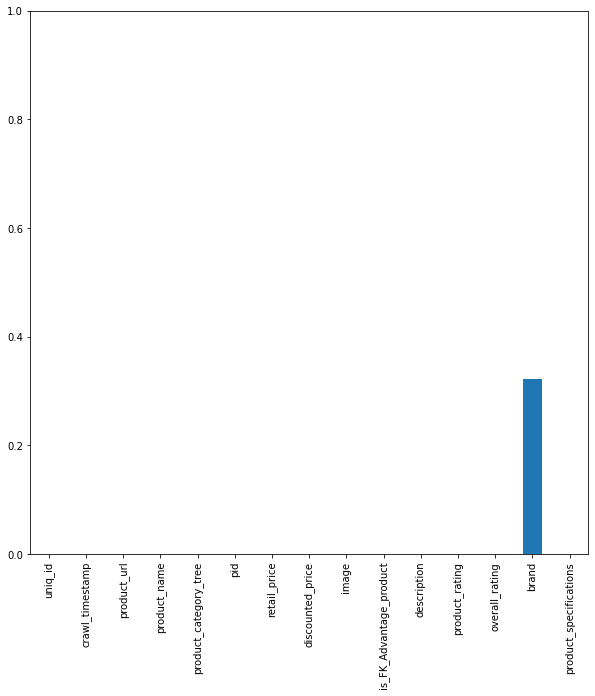

In [5]:
# Visualisation des NaN
features_nan = (data_flpk.isna().sum()) / (data_flpk.shape[0])
plt.figure(figsize=(10, 10))
features_nan.plot.bar()
plt.ylim([0, 1])
plt.show()

In [6]:
# Verification de la présence de doublons des produits
display(data_flpk['uniq_id'].value_counts(),
        data_flpk['product_url'].value_counts(),
        data_flpk['image'].value_counts(),
        data_flpk['description'].value_counts())

48b9e7f78348b95955d7484910b7af15    1
480d24adbc304a52a4e01e45bf8bbccc    1
7ba69836467fe0795bf0e1161fc481d9    1
2cc24452688ed35dfbff566e22e53c95    1
7037dbd17682322c89bdf7203b403381    1
                                   ..
4f6006b716c6546033fbaf9ff32de577    1
a0133654f3911e47f021da4e49d42926    1
d627a270302d23eef773d05ad01fd03c    1
3cdfd9df09f61a8fd178bafcc8dbed31    1
51eb5d22eda4be2a409a336651c50bb1    1
Name: uniq_id, Length: 1050, dtype: int64

http://www.flipkart.com/archies-vj-552-combo-set/p/itme7nk9s5qhbtun?pid=CAGE7NK9KUYNVAF8                                                          1
http://www.flipkart.com/welhouse-cotton-hand-face-towel-set/p/itmee9apfgf4rxyu?pid=BTWEE9APJJHT7ZHA                                               1
http://www.flipkart.com/maxima-23952lmli-swarovski-analog-watch-women/p/itmdunhgvhzaehnd?pid=WATDUNJ7W7ZKGGJQ                                     1
http://www.flipkart.com/shopmania-happy-birthday-gift-starting-letter-g-ceramic-mug/p/itmejg6thbrazu8v?pid=MUGEJG6TBVQSYMUP                       1
http://www.flipkart.com/sonata-8925ym06-analog-watch-women/p/itmdwgamdym6hatm?pid=WATDWGAHG7AHMW6Y                                                1
                                                                                                                                                 ..
http://www.flipkart.com/aapno-rajasthan-marvel-marble-gold-embossed-roli-tika-chopra-showpiece-7-62-cm/p/itmeysp

113783ce1db999778b5a4bd374e61209.jpg    1
aa41433dfba2c7561fa30be3fed1e8f0.jpg    1
387ecd9ec173d61b6dc5ceddc079b150.jpg    1
291d5ff1e50dac3058cf10578f692085.jpg    1
43da6e88dcb61e027ea9112cfab158ee.jpg    1
                                       ..
e8ee7868b0c3d1d04b482cd4f3ec5ccc.jpg    1
7fd12776e6d62da6e1dd3cbc9882ee5f.jpg    1
a4b09aa7927c59fbb39960b3d7919909.jpg    1
873a955df5a2f677a41a7efc94060e41.jpg    1
c38eb8abdaa1d8c28bc8c262761dfbc5.jpg    1
Name: image, Length: 1050, dtype: int64

Key Features of KLOCX Analog Wall Clock Black Round Width: 29.85 cm Height: 1 cm,Specifications of KLOCX Analog Wall Clock (Black, With Glass) General Model Number KLOCX-89 Dimensions Other Dimensions 33.1 x 32.6 x 4.4 cm Height 1 cm Width 29.85 cm Body Features Dial Shape Round                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## Choix de la segmentation de catégories

In [7]:
# Création d'une variable nombre de catégories level
def cat_nb_lv(text):
    """Donne la nombre de catégorie level dans l'arbre de catégories"""
    text_data = text.translate({ord('['): None,
                                ord(']'): None,
                                ord('"'): None})
    text_split = text_data.split('>>')
    categories_list = [cat.strip() for cat in text_split]
    
    return len(categories_list)

data_flpk['category_level_total_number'] = data_flpk['product_category_tree'].apply(cat_nb_lv)
print(f"Nombre minimum de level: {data_flpk['category_level_total_number'].min()}"
      f" ; Nombre maximum de level: {data_flpk['category_level_total_number'].max()}")

Nombre minimum de level: 2 ; Nombre maximum de level: 7


In [8]:
# Création variables d'extraction de la catégorie level
def cat_tree_lv(serie, level):
    """Donne la catégorie level dans l'arbre de catégories"""
    lv_list = []
    for x in range(len(serie)):
        text = serie[x]
        text_data = text.translate({ord('['): None,
                                    ord(']'): None,
                                    ord('"'): None})
        text_split = text_data.split('>>')
        categories_list = [cat.strip() for cat in text_split]
        
        if len(categories_list) >= (level + 1):
            lv_list.append(categories_list[level])
        else:
            lv_list.append(None)
    lv_serie = pd.Series(lv_list)
    return lv_serie

data_flpk['category_tree_level_0'] = cat_tree_lv(data_flpk['product_category_tree'], 0)
data_flpk['category_tree_level_1'] = cat_tree_lv(data_flpk['product_category_tree'], 1)
data_flpk['category_tree_level_2'] = cat_tree_lv(data_flpk['product_category_tree'], 2)
data_flpk['category_tree_level_3'] = cat_tree_lv(data_flpk['product_category_tree'], 3)
data_flpk['category_tree_level_4'] = cat_tree_lv(data_flpk['product_category_tree'], 4)
data_flpk['category_tree_level_5'] = cat_tree_lv(data_flpk['product_category_tree'], 5)
data_flpk['category_tree_level_6'] = cat_tree_lv(data_flpk['product_category_tree'], 6)
data_flpk['category_tree_last_level'] = cat_tree_lv(data_flpk['product_category_tree'], -1)

In [9]:
nb0 = len(data_flpk['category_tree_level_0'].value_counts())
nb1 = len(data_flpk['category_tree_level_1'].value_counts())
nb2 = len(data_flpk['category_tree_level_2'].value_counts())
nb3 = len(data_flpk['category_tree_level_3'].value_counts())
nb4 = len(data_flpk['category_tree_level_4'].value_counts())
nb5 = len(data_flpk['category_tree_level_5'].value_counts())
nb6 = len(data_flpk['category_tree_level_6'].value_counts())
print(f"Niveau 0 : {nb0} categories",
      f"Niveau 1 : {nb1} categories",
     f"Niveau 2 : {nb2} categories",
     f"Niveau 3 : {nb3} categories",
     f"Niveau 4 : {nb4} categories",
     f"Niveau 5 : {nb5} categories",
     f"Niveau 6 : {nb6} categories",)

Niveau 0 : 7 categories Niveau 1 : 62 categories Niveau 2 : 241 categories Niveau 3 : 349 categories Niveau 4 : 297 categories Niveau 5 : 117 categories Niveau 6 : 57 categories


In [10]:
# Nombre de catégories de produits répertoriées
display(data_flpk['category_tree_last_level'].value_counts())
nb_categories = len(data_flpk['category_tree_last_level'].value_counts())
print(f"Nombre total de catégories de produits : {nb_categories}")

Blankets, Quilts & Dohars                              56
Prithish Coffee Mugs                                   26
Maxima Wrist Watches                                   23
Rockmantra Coffee Mugs                                 22
Sonata Wrist Watches                                   19
                                                       ..
Beebay Baby Boy's Checkered Casual Shirt                1
giftsthatwow GTW-G-06 (600 ml, White, Pack of 1)        1
Yves Bertelin YBSCR557 Analog Watch  - For Women        1
Mom and Kid Baby Girl's Printed Green Top & Pyja...     1
Curren Nx Blue Dial Stiched Strap Analog Watch  ...     1
Name: category_tree_last_level, Length: 642, dtype: int64

Nombre total de catégories de produits : 642


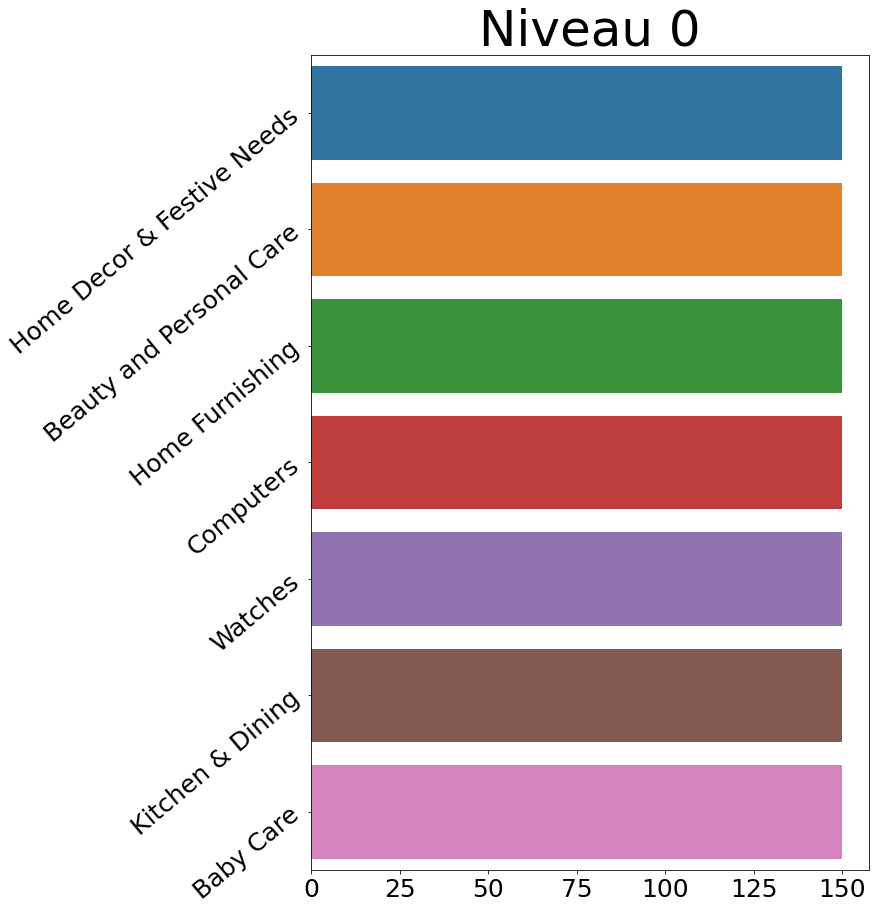

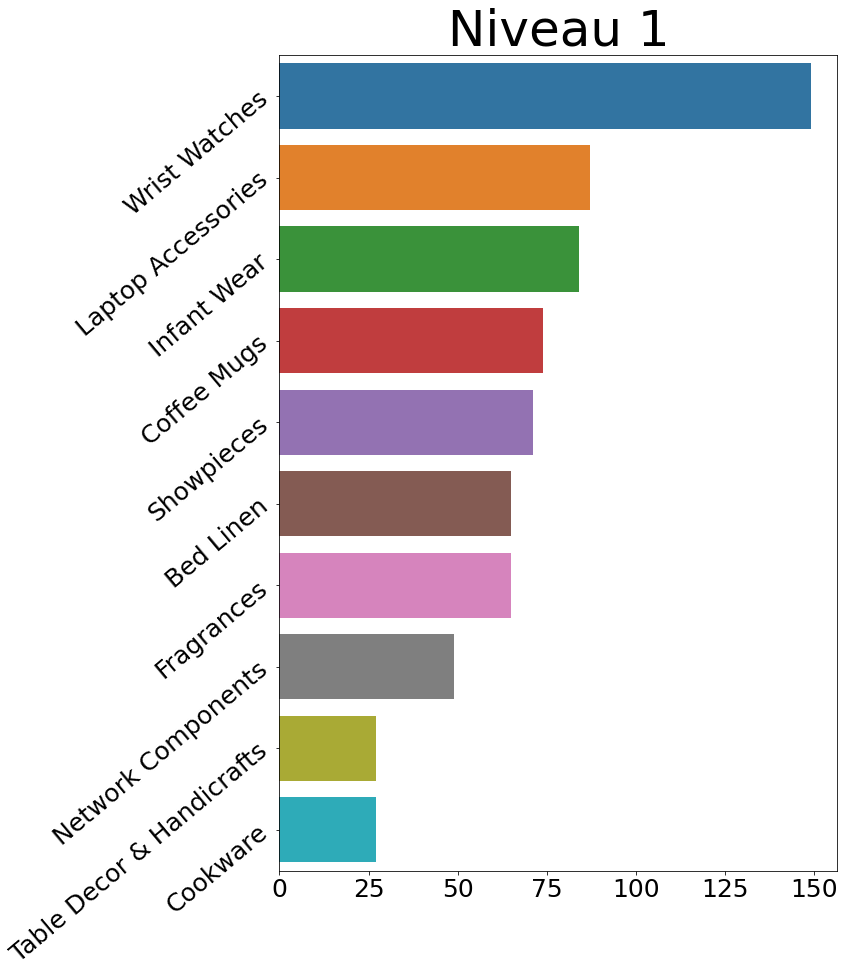

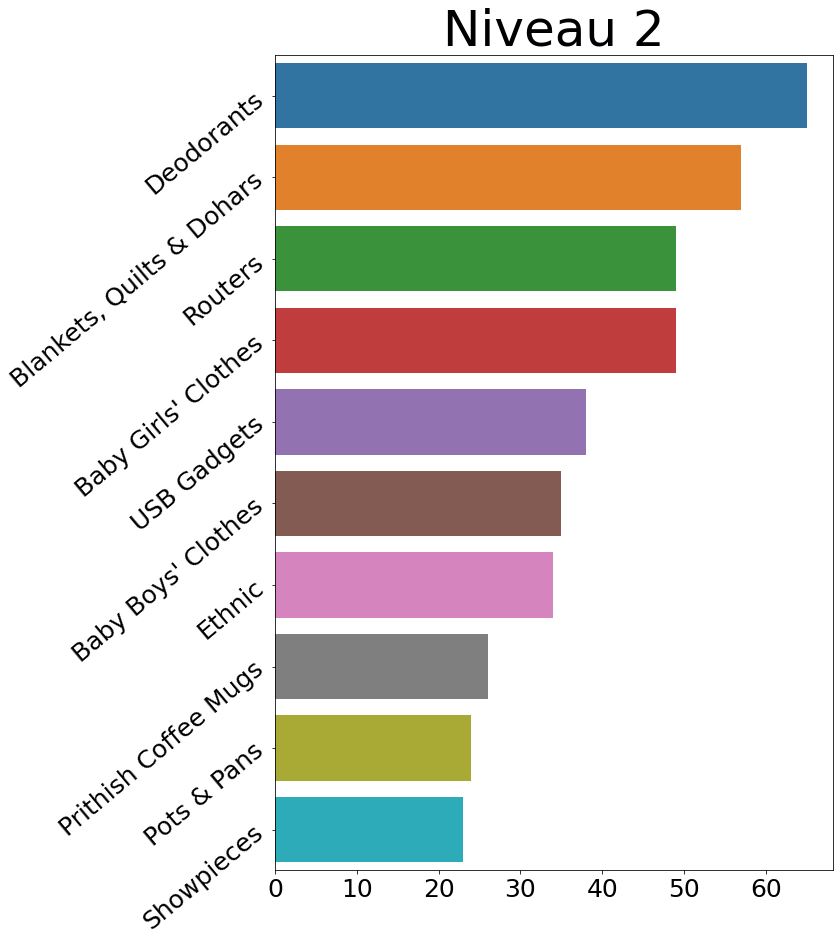

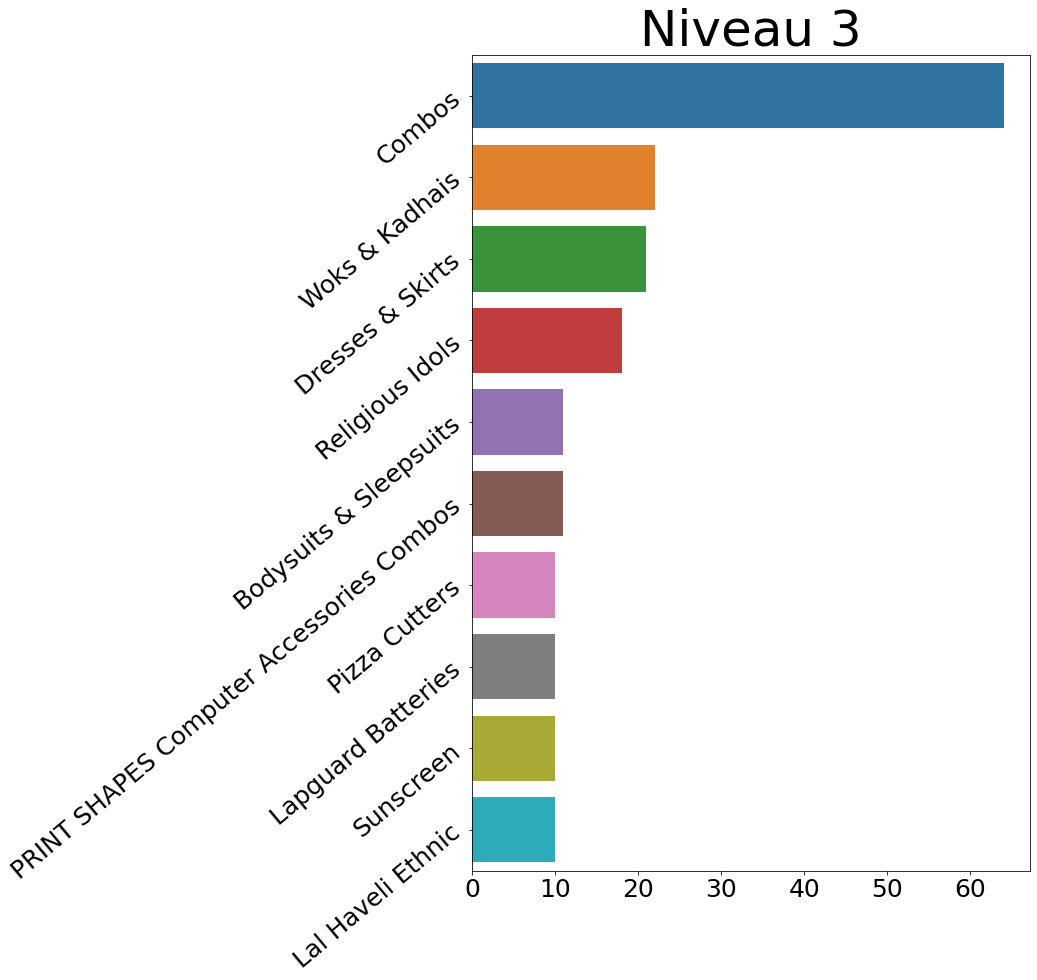

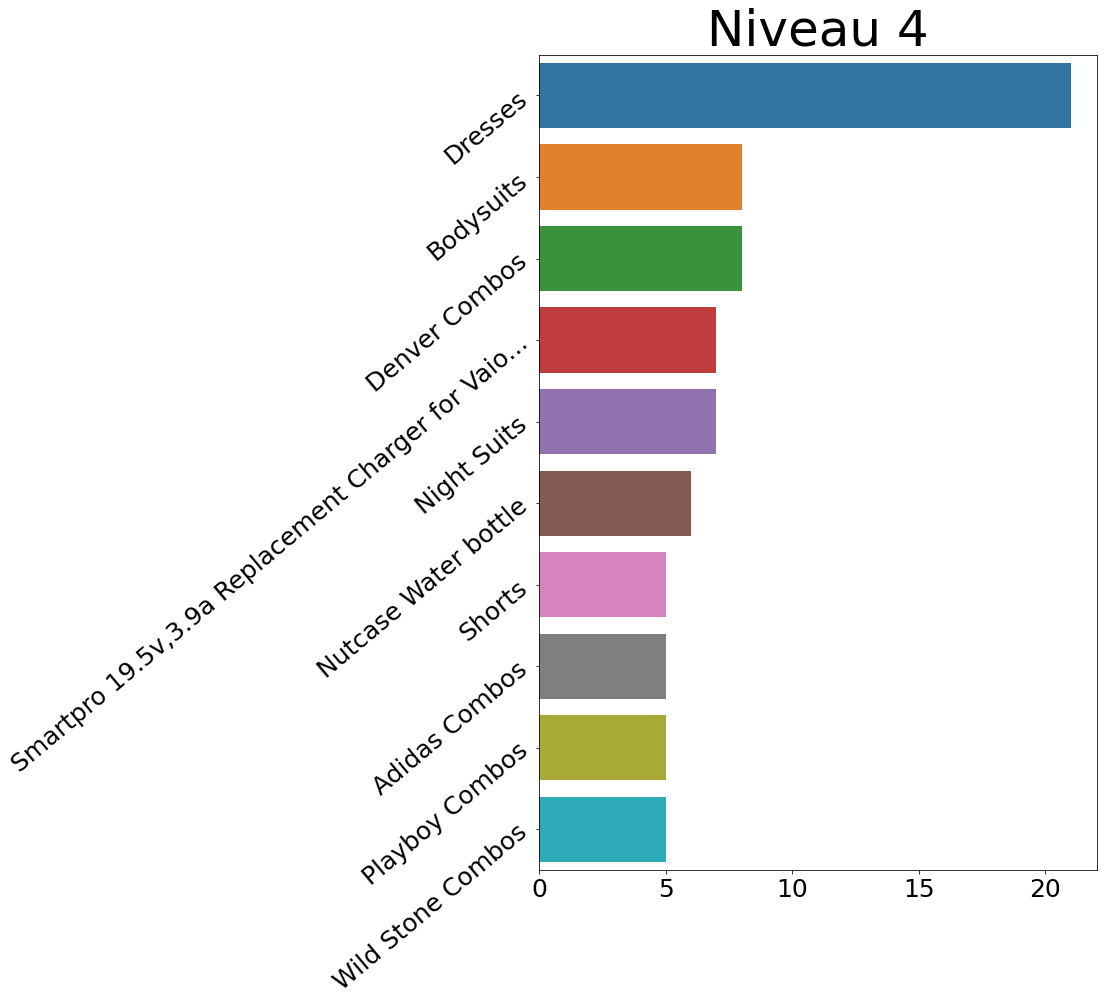

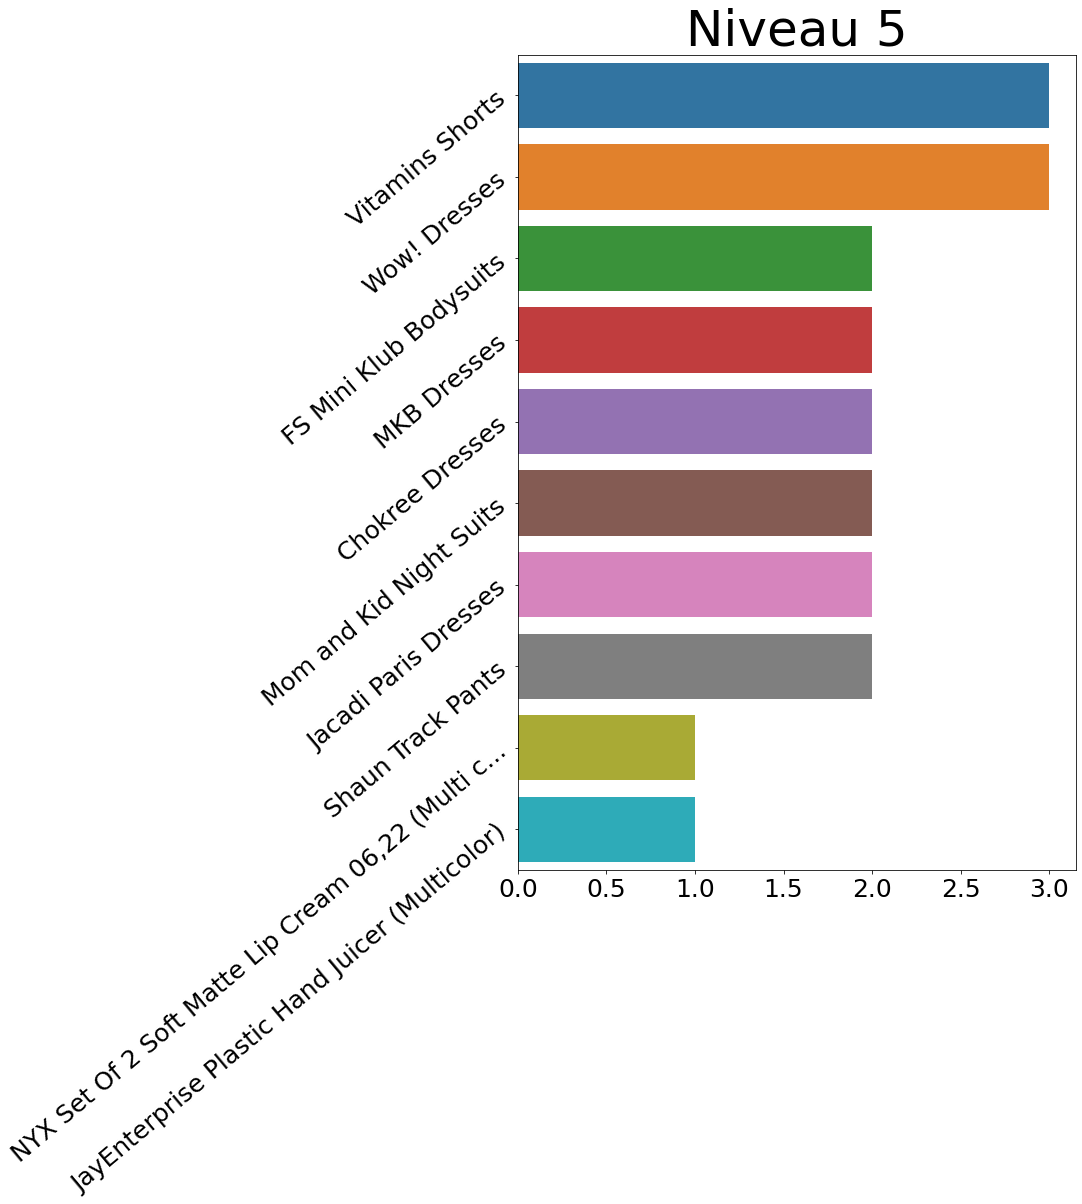

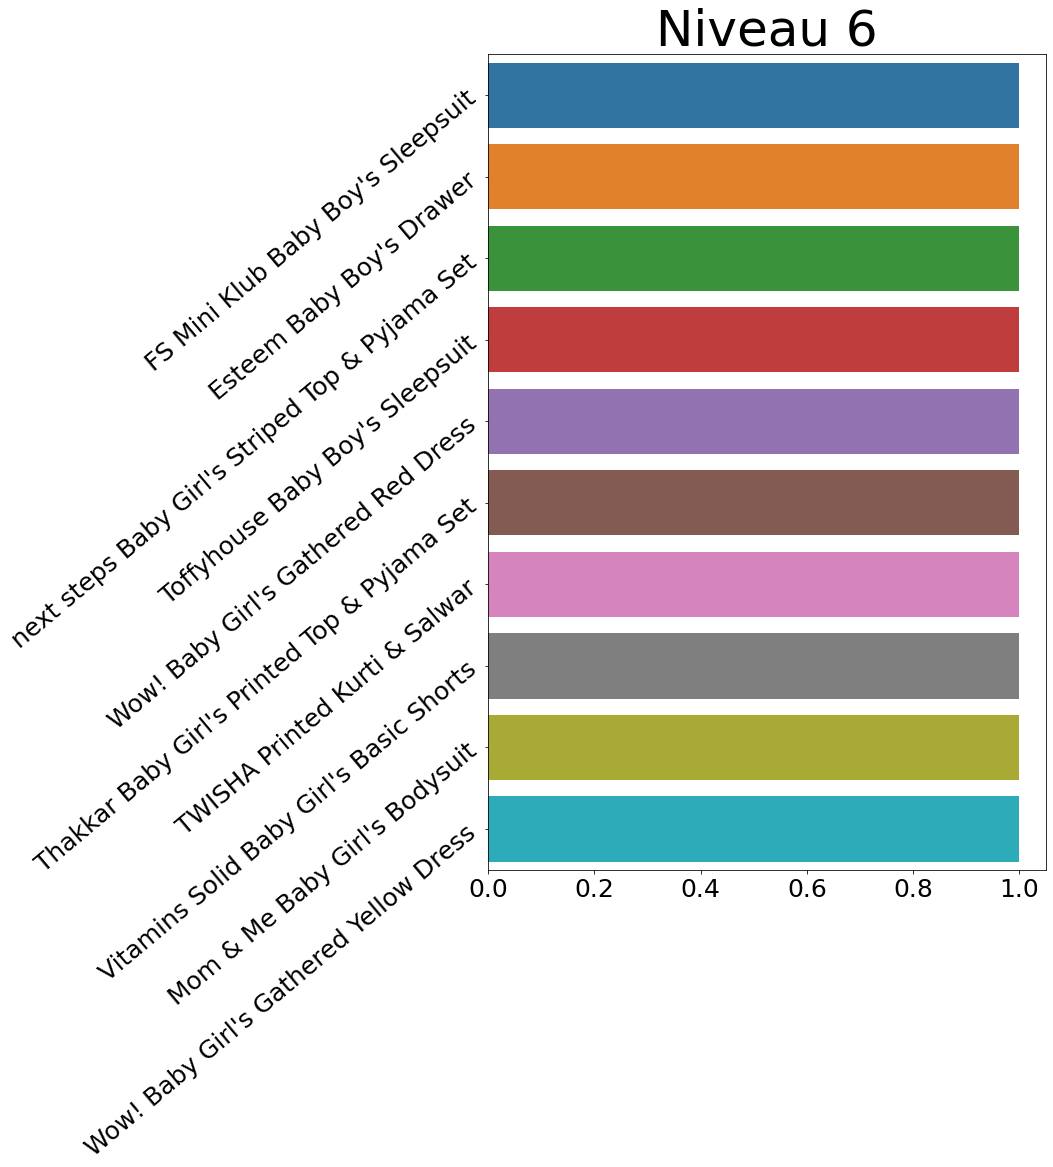

In [11]:
#Visualisation de la distribution des catégories 
plt.figure(figsize=(10, 15))
cat0 = sns.countplot(y=data_flpk['category_tree_level_0'],
                     order=data_flpk['category_tree_level_0'].value_counts().iloc[:10].index,
                     palette='tab10')
cat0.axes.set_title("Niveau 0",fontsize=50)
cat0.set_ylabel("",fontsize=20)
cat0.set_xlabel("",fontsize=20)
plt.yticks(rotation=40)
cat0.tick_params(labelsize=25)
plt.savefig("niveau_0.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(10, 15))
cat1 = sns.countplot(y=data_flpk['category_tree_level_1'],
                     order=data_flpk['category_tree_level_1'].value_counts().iloc[:10].index,
                     palette='tab10')
cat1.axes.set_title("Niveau 1",fontsize=50)
cat1.set_ylabel("",fontsize=20)
cat1.set_xlabel("",fontsize=20)
plt.yticks(rotation=40)
cat1.tick_params(labelsize=25)
plt.savefig("niveau_1.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(10, 15))
cat2 = sns.countplot(y=data_flpk['category_tree_level_2'],
                     order=data_flpk['category_tree_level_2'].value_counts().iloc[:10].index,
                     palette='tab10')
cat2.axes.set_title("Niveau 2",fontsize=50)
cat2.set_ylabel("",fontsize=20)
cat2.set_xlabel("",fontsize=20)
plt.yticks(rotation=40)
cat2.tick_params(labelsize=25)
plt.savefig("niveau_2.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(10, 15))
cat3 = sns.countplot(y=data_flpk['category_tree_level_3'],
                     order=data_flpk['category_tree_level_3'].value_counts().iloc[:10].index,
                     palette='tab10')
cat3.axes.set_title("Niveau 3",fontsize=50)
cat3.set_ylabel("",fontsize=20)
cat3.set_xlabel("",fontsize=20)
plt.yticks(rotation=40)
cat3.tick_params(labelsize=25)
plt.savefig("niveau_3.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(10, 15))
cat4 = sns.countplot(y=data_flpk['category_tree_level_4'],
                     order=data_flpk['category_tree_level_4'].value_counts().iloc[:10].index,
                     palette='tab10')

cat4.axes.set_title("Niveau 4",fontsize=50)
cat4.set_ylabel("",fontsize=20)
cat4.set_xlabel("",fontsize=20)
plt.yticks(rotation=40)
cat4.tick_params(labelsize=25)
plt.savefig("niveau_4.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(10, 15))
cat5 = sns.countplot(y=data_flpk['category_tree_level_5'],
                     order=data_flpk['category_tree_level_5'].value_counts().iloc[:10].index,
                     palette='tab10')
cat5.axes.set_title("Niveau 5",fontsize=50)
cat5.set_ylabel("",fontsize=20)
cat5.set_xlabel("",fontsize=20)
plt.yticks(rotation=40)
cat5.tick_params(labelsize=25)
plt.savefig("niveau_5.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(10, 15))
cat6 = sns.countplot(y=data_flpk['category_tree_level_6'],
                     order=data_flpk['category_tree_level_6'].value_counts().iloc[:10].index,
                     palette='tab10')
cat6.axes.set_title("Niveau 6",fontsize=50)
cat6.set_ylabel("",fontsize=20)
cat6.set_xlabel("",fontsize=20)
plt.yticks(rotation=40)
cat6.tick_params(labelsize=25)
plt.savefig("niveau_5.png", bbox_inches="tight")
plt.show()

# Analyse de texte

## Preprocessing

In [12]:
# Lower text without punctuations description
from string import punctuation
lower_list = []
for row in range(data_flpk['description'].size):
    text = data_flpk['description'][row]
    lowers = text.lower()
    nopunc_table = str.maketrans('', '', punctuation)
    text_nopunc = lowers.translate(nopunc_table)
    lower_list.append(text_nopunc)
data_flpk['lower_description'] = lower_list

In [13]:
# Lower text without punctuations description
from string import punctuation
lower_list = []
for row in range(data_flpk['product_name'].size):
    text = data_flpk['product_name'][row]
    lowers = text.lower()
    nopunc_table = str.maketrans('', '', punctuation)
    text_nopunc = lowers.translate(nopunc_table)
    lower_list.append(text_nopunc)
data_flpk['lower_product_name'] = lower_list

In [14]:
# Fonction de preprocess
def preprocess(text):
    """Fonction de preprocessing"""
    import re
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer, PorterStemmer
    
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(text))

    #Normalize tabs and remove newlines
    no_tabs = str(document).replace('\t', ' ').replace('\n', '');

    #Remove all characters except A-Z and a dot.
    alphas_only = re.sub("[^a-zA-Z]", " ", no_tabs);

    #Normalize spaces to 1
    multi_spaces = re.sub(" +", " ", alphas_only);
    
    #Strip trailing and leading spaces
    no_spaces = multi_spaces.strip();

    #Normalize all charachters to lowercase
    clean_text = no_spaces.lower();

    #Tokenization
    tokens = word_tokenize(clean_text)
    
    # Lematization
    wl = WordNetLemmatizer()
    lemed = [wl.lemmatize(word) for word in tokens]
    #lemed = [word for word in tokens]
    
    # Removed words less than 3 characters
    lemed_1 = [word for word in lemed if len(word)>2]
    
    #Remove stopwords
    from sklearn.feature_extraction import text
    
    new_words = ['pack', 'package', 'flipkart', 'com',
                 'shipping', 'delivery', 'specification',
                 'day', 'free', 'cash', 'discount', 'price',
                 'replacement', 'feature', 'sale', 'guarantee']
    my_stop_words = text.ENGLISH_STOP_WORDS.union(new_words)
    filtered_sentence = [w for w in lemed_1 if w not in my_stop_words]

    # Remove words with numbers
#    numbers = ['0', '1', '2', '3', '4', '5',
#               '6', '7', '8', '9']
#    removed = [w for w in lemed
#               if all(x not in w for x in numbers)]
    
#    return removed
    return filtered_sentence
    #return lemed

In [15]:
# Création de colonnes de preprocess
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

# Premier filtrage des mots
data_flpk['description_preprocess_1'] = data_flpk['description'].apply(preprocess)
data_flpk['product_name_preprocess_1'] = data_flpk['product_name'].apply(preprocess)

# Dexième filtrage des mots (postag)
data_flpk['description_preprocess_2'] = data_flpk['description_preprocess_1'].apply(lambda x: [word for word,tag in pos_tag(x)
                                                                                               if ((tag=='NN')|(tag=='JJ'))])
data_flpk['product_name_preprocess_2'] = data_flpk['product_name_preprocess_1'].apply(lambda x: [word for word,tag in pos_tag(x)
                                                                                               if ((tag=='NN')|(tag=='JJ'))])
# Remise en place des list mots en string sans postag
data_flpk['description_preprocess_3'] = data_flpk['description_preprocess_1'].apply(' '.join)
data_flpk['product_name_preprocess_3'] = data_flpk['product_name_preprocess_1'].apply(' '.join)

# Remise en place des list mots en string avec postag
data_flpk['description_preprocess_4'] = data_flpk['description_preprocess_2'].apply(' '.join)
data_flpk['product_name_preprocess_4'] = data_flpk['product_name_preprocess_2'].apply(' '.join)

# Tokenize de n_fois title + description
# data_flpk['description_preprocess_6'] = data_flpk['description_preprocess_5'].apply(word_tokenize)

In [16]:
X = data_flpk['description'].apply(lambda x: len(x))
y = [i for i, j in enumerate(X) if j == min(X)]
y

[877, 890]

In [17]:
x = 890
print(f"{data_flpk['description'][x]} ------- {data_flpk['description_preprocess_4'][x]}")

Buy IWS Cotton Bath Towel at Rs. 299 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery! ------- cotton bath towel genuine product


In [18]:
# Fonction ajout de n fois produc_name
def add_n_name(n=3, dfname=data_flpk['product_name_preprocess_4'],
               df=data_flpk['description_preprocess_4']):
    """Fonction d'ajout de product name nfois'"""
    dfnameb = dfname + ' '
    df_final = n*dfnameb + df
    
    return df_final

## BoW

In [234]:
Max_df = [0.95, 0.9, 0.8]
Min_df = [2, 4, 5]
ARI_score_1 = []
DB_score_1 = []
final_param_1 = []
for n in range(11):
    df=add_n_name(n=n)
    for max_df in Max_df:
        for min_df in Min_df:
            # TFIDF
            from sklearn.feature_extraction.text import TfidfVectorizer

            tfidf = TfidfVectorizer(tokenizer=preprocess,
                                    max_df=max_df,
                                    min_df=min_df,
                                    ngram_range=(1, 2),
                                    stop_words={'english'})
            values = tfidf.fit_transform(df)

            # Réduction de dimension par t-SNE
            from sklearn.manifold import TSNE

            tsne = TSNE(n_components=2, perplexity=20,
                        random_state=5)
            tsne_results = tsne.fit_transform(values) 

            # KMeans sur les 7 catégories
            from sklearn.cluster import KMeans
            from statistics import mean
                
            kmodel = KMeans(n_clusters=7, random_state=5)
            kmodel.fit(tsne_results)
            data_km = data_flpk.copy()
            data_km['kmeans_labels'] = kmodel.labels_
            
            # Score ARI
            from sklearn.metrics import adjusted_rand_score
            
            ARI = adjusted_rand_score(data_flpk['category_tree_level_0'],
                                      data_km['kmeans_labels'])
            # Score DB
            from sklearn.metrics import davies_bouldin_score
            
            db_score = davies_bouldin_score(tsne_results, data_km['kmeans_labels'])
            
            # Enregistrement paramètres et score
            ARI_score_1.append(ARI)
            DB_score_1.append(db_score)
            final_param_1.append((n, min_df, max_df))

In [235]:
# Meilleurs score ARI et paramètres
print(f"Meilleur ARI = {max(ARI_score_1)} --- Meilleur DB_score = {min(DB_score_1)}")

Meilleur ARI = 0.6524012575799724 --- Meilleur DB_score = 0.6248392534266692


In [236]:
# Détermination des meilleurs paramètres pour max ARI
i1 = [i for i, j in enumerate(ARI_score_1) if j == max(ARI_score_1)]
for i in i1:
    print(f"(n, min_df, max_df) = {final_param_1[i]}")

(n, min_df, max_df) = (3, 4, 0.95)
(n, min_df, max_df) = (3, 4, 0.9)
(n, min_df, max_df) = (3, 4, 0.8)


In [237]:
# Détermination des meilleurs paramètres pour min DB
i1 = [i for i, j in enumerate(DB_score_1) if j == min(DB_score_1)]
for i in i1:
    print(f"(n, min_df, max_df) = {final_param_1[i]}")

(n, min_df, max_df) = (6, 5, 0.95)
(n, min_df, max_df) = (6, 5, 0.9)
(n, min_df, max_df) = (6, 5, 0.8)


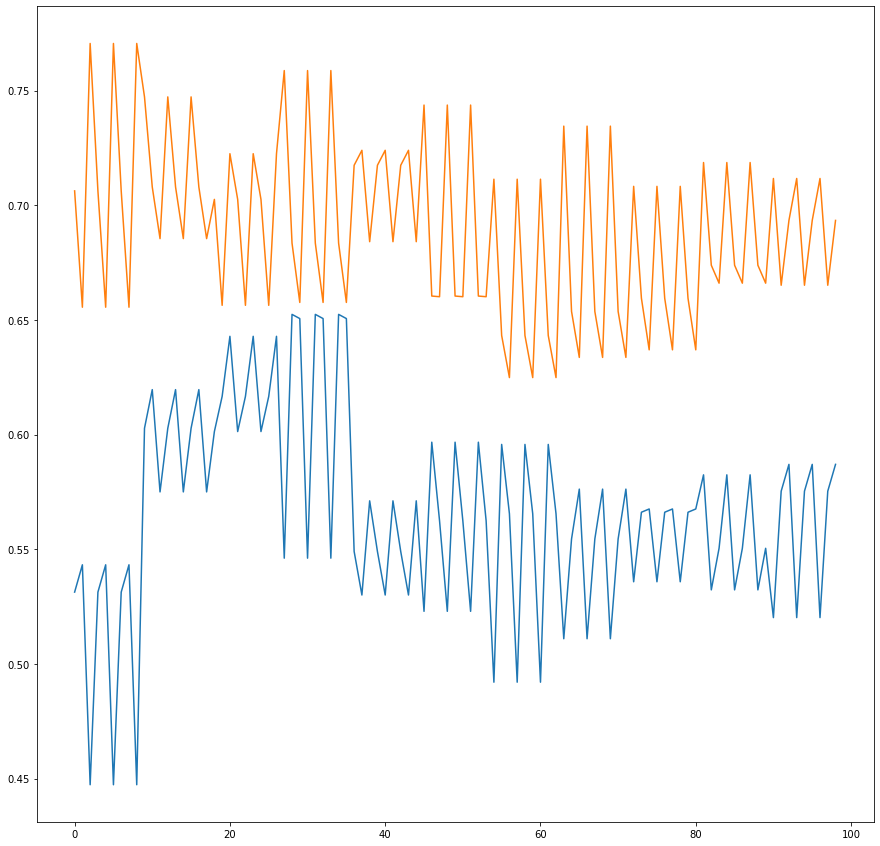

In [238]:
# Evolution de ARI score et DB score en fonction des paramètres
plt.figure(figsize=(15,15))
plt.plot(ARI_score_1)
plt.plot(DB_score_1)
plt.show()

In [52]:
# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=preprocess,
                        ngram_range=(1, 2),
                        max_df=0.95,
                        min_df=4,
                        stop_words={'english'})
values_bow = tfidf.fit_transform(add_n_name(n=3))

In [53]:
# Réduction de dimension par t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20, random_state=5)
tsne_results_bow = tsne.fit_transform(values_bow) 

In [54]:
# KMeans sur les 7 catégories
from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters=7, random_state=5)
kmodel.fit(tsne_results_bow)
data_km = data_flpk.copy()
data_km['kmeans_labels'] = kmodel.labels_

In [55]:
# Score ARI
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score

ARI = adjusted_rand_score(data_flpk['category_tree_level_0'],
                          data_km['kmeans_labels'])
db_score = davies_bouldin_score(tsne_results_bow, data_km['kmeans_labels'])

print(f"ARI = {ARI} ------ DBScore = {db_score}")

ARI = 0.6524012575799724 ------ DBScore = 0.6834639601363376


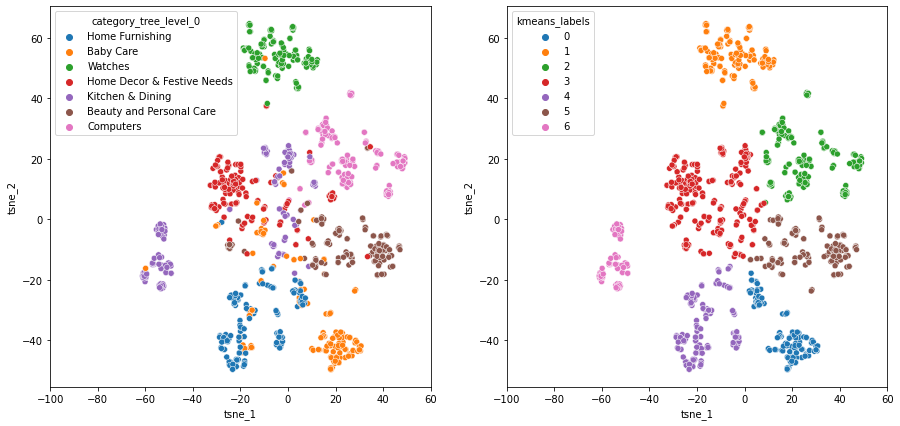

In [279]:
# Plot des samples dans t-SNE plot
data_km['tsne_1'] = tsne_results_bow[:, 0]
data_km['tsne_2'] = tsne_results_bow[:, 1]
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='category_tree_level_0',
                       palette='tab10',
                       data=data_km,
                       legend="full")
plt.xlim([-100, 60])
#plt.ylim([-60, 100])
plt.subplot(1, 2, 2)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='kmeans_labels',
                       palette='tab10',
                       data=data_km,
                       legend="full")
plt.xlim([-100, 60])
#plt.ylim([-60, 100])
plt.savefig("tfidf_tsne.png", bbox_inches="tight")
plt.show()

## WordEmbending

In [74]:
def sent_vectorizer(sent, model):
    """Vectorisation des listes de mots"""
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model.wv[w]
            else:
                sent_vec = np.add(sent_vec, model.wv[w])
            numw+=1
        except:
            #print(f"{w} not found")
            pass
         
    return np.asarray(sent_vec) / numw

In [244]:
Size = [50, 100, 500]
Window = [10, 20, 30]
Min_count = [2, 5, 10]

ARI_score_2 = []
DB_score_2 = []
final_param_2 = []
for n in [2, 5, 10]:
    df=add_n_name(n=n)
    df1=df.apply(word_tokenize)
    for size in Size:
        for window in Window:
            for min_count in Min_count:
                from gensim.models import Word2Vec
                from gensim.models.fasttext import FastText
                w2v = Word2Vec(df1,
                               sg=1,
                               seed=1,
                               size=size,
                               window=window,
                               min_count=min_count,
                               batch_words=5000,
                               sample=1e-3,
                               workers=1)
                X=[]
                for sentence in df1:
                    X.append(sent_vectorizer(sentence, w2v))

                tsne = TSNE(n_components=2, perplexity=20,
                           random_state=5)
                tsne_results = tsne.fit_transform(X)

                # KMeans sur les 7 catégories
                from sklearn.cluster import KMeans
                from statistics import mean

                kmodel = KMeans(n_clusters=7, random_state=5)
                kmodel.fit(tsne_results)
                data_km = data_flpk.copy()
                data_km['kmeans_labels'] = kmodel.labels_
                
                # Score ARI
                from sklearn.metrics import adjusted_rand_score
                ARI = adjusted_rand_score(data_flpk['category_tree_level_0'],
                                          data_km['kmeans_labels'])
                
                # Score DB
                from sklearn.metrics import davies_bouldin_score
            
                db_score = davies_bouldin_score(tsne_results, data_km['kmeans_labels'])
            
                # Enregistrement paramètres et score
                ARI_score_2.append(ARI)
                DB_score_2.append(db_score)
                final_param_2.append((n, size, window, min_count))

In [245]:
# Meilleurs score ARI et paramètres
print(f"Meilleur ARI = {max(ARI_score_2)} --- Meilleur DB_score = {min(DB_score_2)}")

Meilleur ARI = 0.6536461476672027 --- Meilleur DB_score = 0.5810611109948685


In [246]:
ARI_score_2[14]

0.5419498950685844

In [247]:
final_param_2[14]

(2, 100, 20, 10)

In [248]:
# Détermination des meilleurs paramètres pour max ARI
i2 = [i for i, j in enumerate(ARI_score_2) if j == max(ARI_score_2)]
for i in i2:
    print(f"(n, size, window, min_count) = {final_param_2[i]}")

(n, size, window, min_count) = (2, 100, 20, 5)


In [249]:
# Détermination des meilleurs paramètres pour min DB
i2db = [i for i, j in enumerate(DB_score_2) if j == min(DB_score_2)]
for i in i2db:
    print(f"(n, size, window, min_count) = {final_param_2[i]}")

(n, size, window, min_count) = (5, 500, 30, 5)


In [56]:
from gensim.models import Word2Vec
df = add_n_name(n=2)
df1=df.apply(word_tokenize)
w2v = Word2Vec(df1,
               sg=1,
               seed=1,
               size=100,
               window=20,
               batch_words=5000,
               min_count=5,
               sample=1e-3,
               workers=1)
#X_w2v=[]
#for sentence in df1:
#    X_w2v.append(sent_vectorizer(sentence, w2v))  

In [75]:
X_w2v=[]
for sentence in df1:
    X_w2v.append(sent_vectorizer(sentence, w2v)) 
#X_w2v.shape

In [76]:
len(X_w2v)

1050

In [77]:
# Réduction de dimension par t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20,
            random_state=5)
tsne_results_w2v = tsne.fit_transform(X_w2v) 

In [78]:
# KMeans sur les 7 catégories
from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters=7, random_state=5)
kmodel.fit(tsne_results_w2v)
data_km = data_flpk.copy()
data_km['kmeans_labels'] = kmodel.labels_

In [79]:
# Score ARI
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score

ARI = adjusted_rand_score(data_flpk['category_tree_level_0'],
                          data_km['kmeans_labels'])
db_score = davies_bouldin_score(tsne_results_w2v, data_km['kmeans_labels'])

print(f"ARI = {ARI} ------ DBScore = {db_score}")

ARI = 0.64914971174548 ------ DBScore = 0.6828437177414995


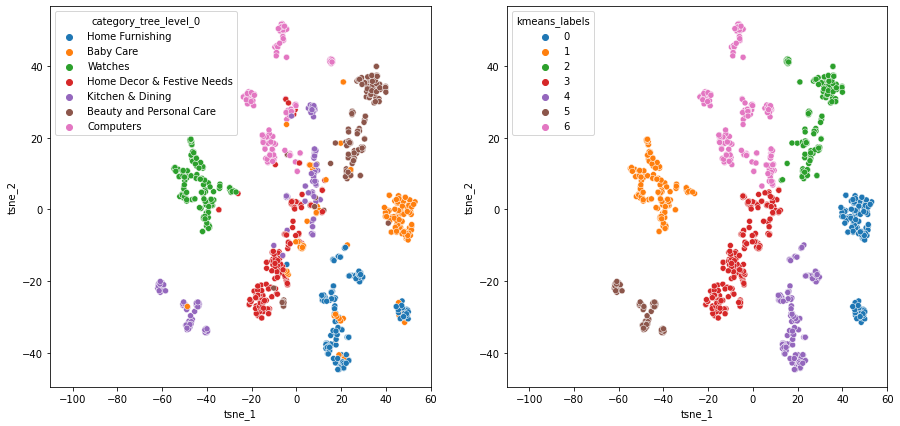

In [296]:
# Plot des samples dans t-SNE plot
data_km['tsne_1'] = tsne_results_w2v[:, 0]
data_km['tsne_2'] = tsne_results_w2v[:, 1]
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='category_tree_level_0',
                       palette='tab10',
                       data=data_km,
                       legend="full")
plt.xlim([-110, 60])
plt.subplot(1, 2, 2)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='kmeans_labels',
                       palette='tab10',
                       data=data_km,
                       legend="full")
plt.xlim([-110, 60])
plt.savefig("w2v_tsne.png", bbox_inches="tight")
plt.show()

## Topic modelling

### Par LDA

In [251]:
Max_df = [0.9, 0.8, 0.5, 0.4]
Min_df = [5, 10, 20]
N = [0, 2, 5, 10]
n_grams = [(1,1), (1,2)]
Max_features = [10, 100, 1000]
n_topics=7

ARI_score_3=[]
DB_score_3 = []
Likehood = []
Perplexity = []
final_params_3=[]

for n in N:
    df=add_n_name(n=n)
    for min_df in Min_df:
        for max_df in Max_df:
            for ngram in n_grams:
                for max_features in Max_features:
                # Comptage
                    from sklearn.feature_extraction.text import CountVectorizer

                    cnt_vectorizer = CountVectorizer(max_df=max_df, min_df=min_df,
                                                     max_features=max_features,
                                                     ngram_range=ngram,
                                                     token_pattern='[a-zA-Z0-9]{3,}',
                                                     stop_words='english')
                    cnt = cnt_vectorizer.fit_transform(df)

                    # LDA fit
                    from sklearn.decomposition import LatentDirichletAllocation

                    lda = LatentDirichletAllocation(n_components=n_topics,
                                                    learning_method='online',
                                                    random_state=5)
                    lda_results = lda.fit_transform(cnt)
                    lda_score = lda.score(cnt)
                    lda_perplexity = lda.perplexity(cnt)

                    # KMeans sur les 7 catégories
                    from sklearn.cluster import KMeans

                    kmodel = KMeans(n_clusters=7, random_state=5)
                    kmodel.fit(lda_results)
                    data_kmlda = data_flpk.copy()
                    data_kmlda['kmeans_labels'] = kmodel.labels_

                    # Score ARI
                    ARI = adjusted_rand_score(data_flpk['category_tree_level_0'],
                                              data_kmlda['kmeans_labels'])
                    
                    # Score DB
                    from sklearn.metrics import davies_bouldin_score
            
                    db_score = davies_bouldin_score(lda_results, data_kmlda['kmeans_labels'])
                    
                     
                    ARI_score_3.append(ARI)
                    DB_score_3.append(db_score)
                    Likehood.append(lda_score)
                    Perplexity.append(lda_perplexity)
                    final_params_3.append((n, min_df, max_df, ngram, max_features))

In [252]:
# Meilleurs score ARI et paramètres
print(f"Meilleur ARI = {max(ARI_score_3)} --- Meilleur DB_score = {min(DB_score_3)}")

Meilleur ARI = 0.46722327435978345 --- Meilleur DB_score = 0.2512837509483869


In [253]:
# Meilleurs score Ressemblance et perplexity
print(f"Meilleur Loglikehood = {max(Likehood)} --- Meilleur Perplexity = {min(Perplexity)}")

Meilleur Loglikehood = -5962.183016005916 --- Meilleur Perplexity = 2.6786060121096273


In [254]:
# Détermination des meilleurs paramètres pour Loglikehood
il = [i for i, j in enumerate(Likehood) if j == max(Likehood)]
for i in il:
    print(f"(n, min_df, max_df, ngram, max_features) = {final_params_3[i]}")

(n, min_df, max_df, ngram, max_features) = (2, 5, 0.5, (1, 2), 10)
(n, min_df, max_df, ngram, max_features) = (2, 5, 0.4, (1, 2), 10)
(n, min_df, max_df, ngram, max_features) = (2, 10, 0.5, (1, 2), 10)
(n, min_df, max_df, ngram, max_features) = (2, 10, 0.4, (1, 2), 10)
(n, min_df, max_df, ngram, max_features) = (2, 20, 0.5, (1, 2), 10)
(n, min_df, max_df, ngram, max_features) = (2, 20, 0.4, (1, 2), 10)


In [255]:
# Détermination des meilleurs paramètres pour Perplexity
ip = [i for i, j in enumerate(Perplexity) if j == min(Perplexity)]
for i in ip:
    print(f"(n, min_df, max_df, ngram, max_features) = {final_params_3[i]}")

(n, min_df, max_df, ngram, max_features) = (10, 5, 0.5, (1, 1), 10)
(n, min_df, max_df, ngram, max_features) = (10, 5, 0.4, (1, 1), 10)
(n, min_df, max_df, ngram, max_features) = (10, 10, 0.5, (1, 1), 10)
(n, min_df, max_df, ngram, max_features) = (10, 10, 0.4, (1, 1), 10)
(n, min_df, max_df, ngram, max_features) = (10, 20, 0.5, (1, 1), 10)
(n, min_df, max_df, ngram, max_features) = (10, 20, 0.4, (1, 1), 10)


In [256]:
# Détermination des meilleurs paramètres pour max ARI
i3 = [i for i, j in enumerate(ARI_score_3) if j == max(ARI_score_3)]
for i in i3:
    print(f"(n, min_df, max_df, ngram, max_features) = {final_params_3[i]}")

(n, min_df, max_df, ngram, max_features) = (10, 5, 0.5, (1, 2), 1000)
(n, min_df, max_df, ngram, max_features) = (10, 5, 0.4, (1, 2), 1000)


In [257]:
# Détermination des meilleurs paramètres pour min DB
i3db = [i for i, j in enumerate(DB_score_3) if j == min(DB_score_3)]
for i in i3db:
    print(f"(n, min_df, max_df, ngram, max_features) = {final_params_3[i]}")

(n, min_df, max_df, ngram, max_features) = (5, 5, 0.5, (1, 2), 10)
(n, min_df, max_df, ngram, max_features) = (5, 5, 0.4, (1, 2), 10)
(n, min_df, max_df, ngram, max_features) = (5, 10, 0.5, (1, 2), 10)
(n, min_df, max_df, ngram, max_features) = (5, 10, 0.4, (1, 2), 10)
(n, min_df, max_df, ngram, max_features) = (5, 20, 0.5, (1, 2), 10)
(n, min_df, max_df, ngram, max_features) = (5, 20, 0.4, (1, 2), 10)


In [80]:
# Fonction de visualisation des topics

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print("/".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10

In [81]:
# Comptage
df = add_n_name(n=10)
from sklearn.feature_extraction.text import CountVectorizer

cnt_vectorizer = CountVectorizer(max_df=0.5, min_df=5,
                                 max_features=1000,
                                 ngram_range=(1, 2),
                                 token_pattern='[a-zA-Z0-9]{3,}',
                                 stop_words='english')
cnt = cnt_vectorizer.fit_transform(df)

In [82]:
# LDA fit
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 7
lda = LatentDirichletAllocation(n_components=n_topics,
                                learning_method='online',
                                random_state=5)
lda_results = lda.fit_transform(cnt)
lda_score = lda.score(cnt)
lda_perplexity = lda.perplexity(cnt)

display(f"Log likehood: {lda_score}, Perplexity: {lda_perplexity}")        

'Log likehood: -451354.0429759039, Perplexity: 165.84877313599057'

In [83]:
# KMeans sur les 7 catégories
from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters=7, random_state=5)
kmodel.fit(lda_results)
data_kmlda = data_flpk.copy()
data_kmlda['kmeans_labels'] = kmodel.labels_

In [84]:
# Réduction de dimension par t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20,
           random_state=5)
tsne_results_lda = tsne.fit_transform(lda_results) 

In [85]:
# Score ARI
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score

ARI = adjusted_rand_score(data_flpk['category_tree_level_0'],
                          data_kmlda['kmeans_labels'])
db_score = davies_bouldin_score(lda_results, data_kmlda['kmeans_labels'])

print(f"ARI = {ARI} ------ DBScore = {db_score}")

ARI = 0.46722327435978345 ------ DBScore = 0.47624772652602954


In [326]:
display_topics(lda, cnt_vectorizer.get_feature_names(), 10)

Topic 0:
polyester/curtain/eyelet/single/comfort/design/aroma/aroma comfort/abstract/door
Topic 1:
mug/showpiece/ceramic/ceramic mug/gift/prithish/rockmantra/mug prithish/kadhai/mug rockmantra
Topic 2:
usb/laptop/light/battery/cell/adapter/laptop battery/usb light/cell laptop/warranty
Topic 3:
analog/watch/sticker/analog watch/woman/watch woman/vinyl/vinyl sticker/large/medium
Topic 4:
showpiece/cream/color/hair/bottle/box/flexible/design/massage/vitamin
Topic 5:
baby/girl/cotton/baby girl/towel/dress/boy/baby boy/shirt/bath
Topic 6:
combo/set/combo set/skin/laptop/print/shape/laptop skin/print shape/mouse


In [327]:
# Visualisatuin LDA results
import pyLDAvis
import pyLDAvis.sklearn
#pyLDAvis.enable_notebook()
#import pyLDAvis.gensim_models
lda_vis = pyLDAvis.sklearn.prepare(lda, cnt, cnt_vectorizer) 
pyLDAvis.display(lda_vis)

C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


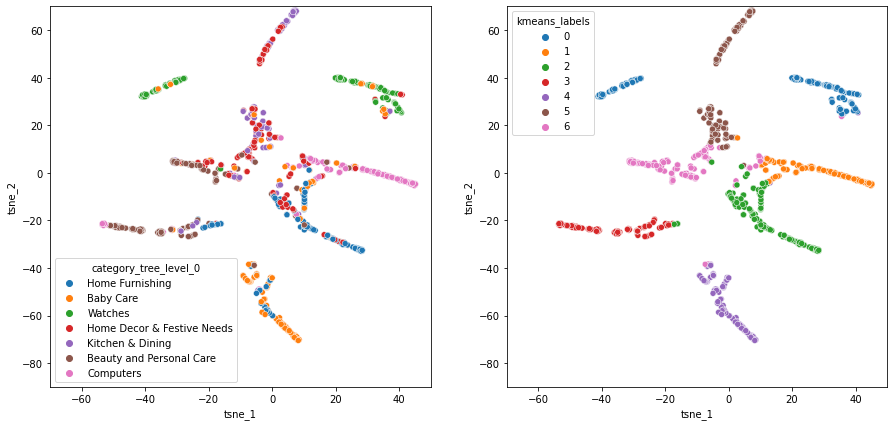

In [343]:
# Plot des samples dans t-SNE plot
data_kmlda['tsne_1'] = tsne_results_lda[:, 0]
data_kmlda['tsne_2'] = tsne_results_lda[:, 1]
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='category_tree_level_0',
                       palette='tab10',
                       data=data_kmlda,
                       legend="full")
plt.xlim([-70, 50])
plt.ylim([-90, 70])
plt.subplot(1, 2, 2)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='kmeans_labels',
                       palette='tab10',
                       data=data_kmlda,
                       legend="full")
plt.xlim([-70, 50])
plt.ylim([-90, 70])
plt.savefig("tsne_lda.png", bbox_inches="tight")
plt.show()

## USE

In [62]:
import tensorflow as tens
import tensorflow_hub as hub

In [63]:
encoder = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [259]:
ARI_score_4 = []
DB_score_4 = []
final_params_4 = []
for n in range(11):
    df = add_n_name(n=n)
    tf_tensor = encoder(df.values)
    df_use = pd.DataFrame(tens.make_ndarray(tens.make_tensor_proto(tf_tensor)),
                         index=df.index,
                         columns=['dim'+str(i) for i in range(512)])

    # Réduction de dimension par t-SNE
    from sklearn.manifold import TSNE

    tsne = TSNE(n_components=2, perplexity=20,
                random_state=5)
    tsne_results = tsne.fit_transform(df_use) 

    # KMeans sur les 7 catégories
    from sklearn.cluster import KMeans

    kmodel = KMeans(n_clusters=7, random_state=5)
    kmodel.fit(tsne_results)
    data_kmuse = data_flpk.copy()
    data_kmuse['kmeans_labels'] = kmodel.labels_

    # Score ARI
    from sklearn.metrics import adjusted_rand_score
    
    ARI = adjusted_rand_score(data_flpk['category_tree_level_0'],
                              data_kmuse['kmeans_labels'])
    
     # Score DB
    from sklearn.metrics import davies_bouldin_score
        
    db_score = davies_bouldin_score(tsne_results, data_kmuse['kmeans_labels'])
    
    ARI_score_4.append(ARI)
    DB_score_4.append(db_score)
    final_params_4.append(n)

In [260]:
# Meilleurs score ARI et paramètres
print(f"Meilleur ARI = {max(ARI_score_4)} --- Meilleur DB_score = {min(DB_score_4)}")

Meilleur ARI = 0.6220413983196331 --- Meilleur DB_score = 0.6488791089544608


In [261]:
# Détermination des meilleurs paramètres pour max ARI
i4 = [i for i, j in enumerate(ARI_score_4) if j == max(ARI_score_4)]
for i in i4:
    print(f"n = {final_params_4[i]}")

n = 3


In [262]:
# Détermination des meilleurs paramètres pour min DB
i4db = [i for i, j in enumerate(DB_score_4) if j == min(DB_score_4)]
for i in i4db:
    print(f"n = {final_params_4[i]}")

n = 2


In [64]:
df = add_n_name(n=3)
tf_tensor = encoder(df.values)
df_use = pd.DataFrame(tens.make_ndarray(tens.make_tensor_proto(tf_tensor)),
                      index=df.index,
                      columns=['dim'+str(i) for i in range(512)])

In [65]:
# Réduction de dimension par t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20,
            random_state=5)
tsne_results_use = tsne.fit_transform(df_use) 

In [66]:
# KMeans sur les 7 catégories
from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters=7, random_state=5)
kmodel.fit(tsne_results_use)
data_kmuse = data_flpk.copy()
data_kmuse['kmeans_labels'] = kmodel.labels_

In [67]:
# Score ARI
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score

ARI = adjusted_rand_score(data_flpk['category_tree_level_0'],
                          data_kmuse['kmeans_labels'])
db_score = davies_bouldin_score(tsne_results_use, data_kmuse['kmeans_labels'])

print(f"ARI = {ARI} ------ DBScore = {db_score}")

ARI = 0.6220413983196331 ------ DBScore = 0.6827073483176844


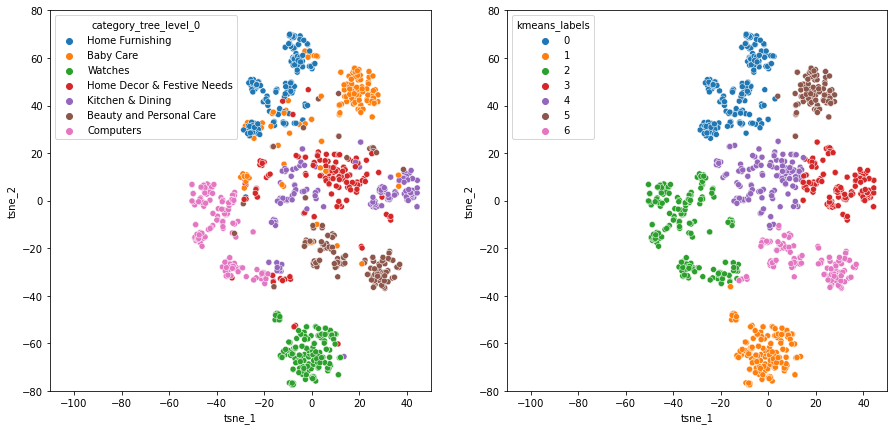

In [315]:
# Plot des samples dans t-SNE plot
data_kmuse['tsne_1'] = tsne_results_use[:, 0]
data_kmuse['tsne_2'] = tsne_results_use[:, 1]
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='category_tree_level_0',
                       palette='tab10',
                       data=data_kmuse,
                       legend="full")
plt.ylim([-80, 80])
plt.xlim([-110, 50])
plt.subplot(1, 2, 2)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='kmeans_labels',
                       palette='tab10',
                       data=data_kmuse,
                       legend="full")
plt.ylim([-80, 80])
plt.xlim([-110, 50])
plt.savefig("use_tsne.png", bbox_inches="tight")
plt.show()

# Traitement des images

In [19]:
path = r"C:\\Users\\ilyas\\Documents\\ILYAS\\Reconversion_Data_Scientist\\Openclassrooms\\Cours\\Projet 6\\Images\\"
list_photos = [data_flpk['image'][i] for i in range(data_flpk.shape[0])]
print(len(list_photos))

1050


In [20]:
import cv2
height = []
width = []
for x in range(len(list_photos)):
    image = cv2.imread(path+list_photos[x])
    height.append(image.shape[0])
    width.append(image.shape[1])
print(f"Hauteur maximum:{max(height)} ---- Largeur maximum: {max(width)}")
print(f"Hauteur minimum:{min(height)} ---- Largeur minimum: {min(width)}")

Hauteur maximum:11042 ---- Largeur maximum: 8484
Hauteur minimum:160 ---- Largeur minimum: 145


In [21]:
min_height = [i for i, j in enumerate(height) if j==min(height)]
max_height = [i for i, j in enumerate(height) if j==max(height)]
min_width = [i for i, j in enumerate(width) if j==min(width)]
max_width = [i for i, j in enumerate(width) if j==max(width)]

Image la plus haute


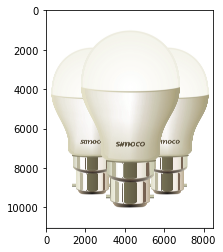

Image la moins haute


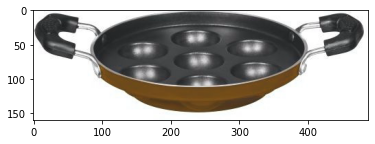

Image la plus large


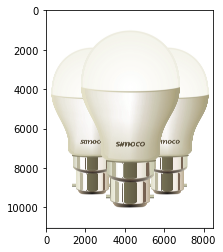

Image la moins large


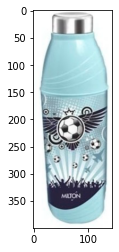

In [22]:
print('Image la plus haute')
plt.imshow(cv2.imread(path+list_photos[max_height[0]]))
plt.show()
print('Image la moins haute')
plt.imshow(cv2.imread(path+list_photos[min_height[0]]))
plt.show()
print('Image la plus large')
plt.imshow(cv2.imread(path+list_photos[max_width[0]]))
plt.show()
print('Image la moins large')
plt.imshow(cv2.imread(path+list_photos[min_width[0]]))
plt.show()

In [23]:
list_labels = data_flpk["category_tree_level_0"].value_counts().index.to_list()
list_labels

['Home Decor & Festive Needs',
 'Beauty and Personal Care',
 'Home Furnishing',
 'Computers',
 'Watches',
 'Kitchen & Dining',
 'Baby Care']

In [24]:
from matplotlib.image import imread

def list_fct(name) :
    list_image_name = [data_flpk['image'][i] for i in range(data_flpk.shape[0])
                       if data_flpk["category_tree_level_0"][i]==name]
    return list_image_name

list_furnishing=list_fct("Home Furnishing")
list_baby=list_fct("Baby Care")
list_decor=list_fct("Home Decor & Festive Needs")
list_beauty=list_fct("Beauty and Personal Care")
list_computer=list_fct("Computers")
list_watches=list_fct("Watches")
list_kitchen=list_fct("Kitchen & Dining")

Home Decor & Festive Needs


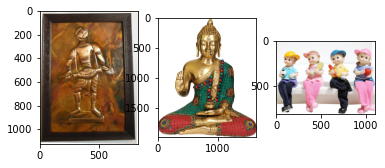

Beauty and Personal Care


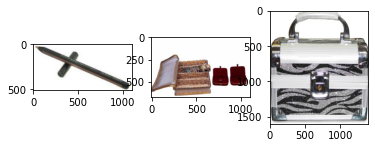

Home Furnishing


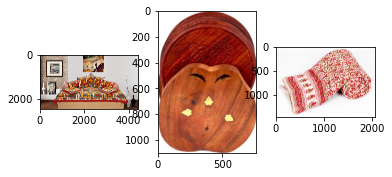

Computers


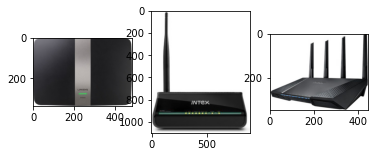

Watches


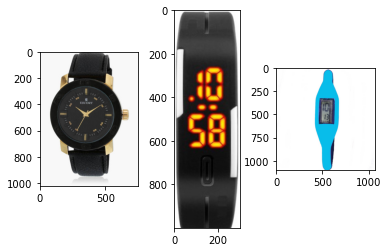

Kitchen & Dining


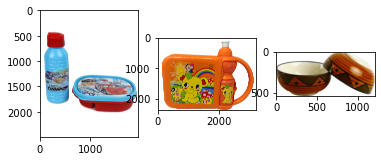

Baby Care


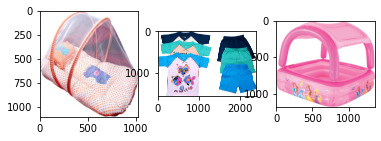

In [25]:
for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

In [26]:
def resize_pad(image, size):
    """Fontion de resize des images à size*size avec padding"""
    import cv2
    
    if image.shape[0]>image.shape[1]:
        height = size
        width = int((height/image.shape[0])*image.shape[1])
        dsize = (width, height)
        image1 = cv2.resize(image, dsize)
        tp = 0
        bt = 0
        lft = int((size - image1.shape[1]))
        rgt = 0
        image2 = cv2.copyMakeBorder(image1,tp,bt,lft,rgt,
                                    cv2.BORDER_CONSTANT,value=[255, 255, 255])
    elif image.shape[0]<image.shape[1]:
        width = size
        height = int((width/image.shape[1])*image.shape[0])
        dsize = (width, height)
        image1 = cv2.resize(image, dsize)
        tp = int((size - image1.shape[0]))
        bt = 0
        lft = 0
        rgt = 0
        image2 = cv2.copyMakeBorder(image1,tp,bt,lft,rgt,
                                    cv2.BORDER_CONSTANT,value=[255, 255, 255])
    elif image.shape[0]==image.shape[1]:
        width = size
        height = int((width/image.shape[1])*image.shape[0])
        dsize = (width, height)
        image1 = cv2.resize(image, dsize)
        tp = 0
        bt = 0
        lft = 0
        rgt = 0
        image2 = cv2.copyMakeBorder(image1,tp,bt,lft,rgt,
                                    cv2.BORDER_CONSTANT,value=[255, 255, 255])
    return image2

# Descripteurs SIFT

## Détermination et affichage des descripteurs

* L'image la plus petite contient 1652 descripteurs
* Chaque descripteur est un vecteur de longueur 128

Image brut


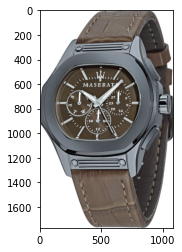

Image gris


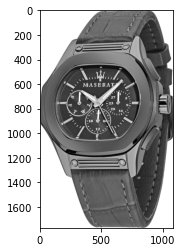

Image nouvelle taille avec padding


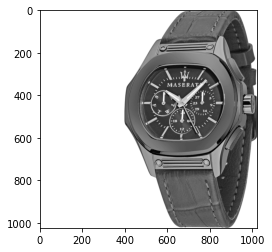

Contraste adapté et egalisation des histogrammes


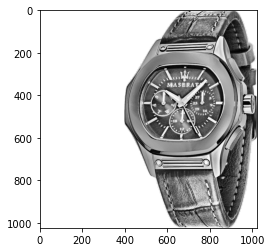

Image prétraitée et descripteurs


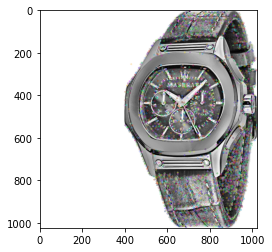

Descripteurs :  (4508, 128)

[[17.  1.  0. ...  0.  0.  0.]
 [26.  2.  0. ...  0.  0.  0.]
 [49.  7.  0. ...  0.  0.  1.]
 ...
 [75.  0.  0. ...  0.  0.  3.]
 [64. 10.  1. ...  0.  0.  0.]
 [57.  5.  0. ...  0.  0.  1.]]


In [27]:
import cv2

sift = cv2.SIFT_create()
image = cv2.imread(path+list_photos[5])
print('Image brut')
plt.imshow(image)
plt.savefig("Image_brut.png")
plt.show()
image = cv2.imread(path+list_photos[5], 0) # convert in gray
print('Image gris')
plt.imshow(image, cmap='gray')
plt.savefig("Image_gris.png")
plt.show()
image = resize_pad(image, 1024)
print('Image nouvelle taille avec padding')
plt.imshow(image, cmap='gray')
plt.savefig("Image_padding.png")
plt.show()
#image = cv2.equalizeHist(image)   # equalize image histogram
#print('Egalisation des histogrammes')
#plt.imshow(image, cmap='gray')
#plt.show()
clahe = cv2.createCLAHE()          # Equalization by CLAHE
image = clahe.apply(image)
print('Contraste adapté et egalisation des histogrammes')
plt.imshow(image, cmap='gray')
plt.savefig("Image_contraste.png")
plt.show()
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
print('Image prétraitée et descripteurs')
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

## Pré-traitement des images

### Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [28]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create()
clahe = cv2.createCLAHE()

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    image = resize_pad(image, 1024)
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #res = cv2.equalizeHist(image)   # equalize image histogram
    res = clahe.apply(image)
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints, dtype='object')
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (6453749, 128)
temps de traitement SIFT descriptor :           476.22 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [29]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k,
                                 batch_size=2000, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  2540
Création de 2540 clusters de descripteurs ...
temps de traitement kmeans :          1365.95 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [30]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features_sift = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            98.67 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [103]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features_sift.shape)
pca = decomposition.PCA(n_components=0.90)
feat_pca= pca.fit_transform(im_features_sift)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 2540)
Dimensions dataset après réduction PCA :  (1050, 268)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [104]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30,
                     random_state=6)
X_tsne_sift = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne_sift[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_flpk["category_tree_level_0"]
print(df_tsne.shape)


(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images

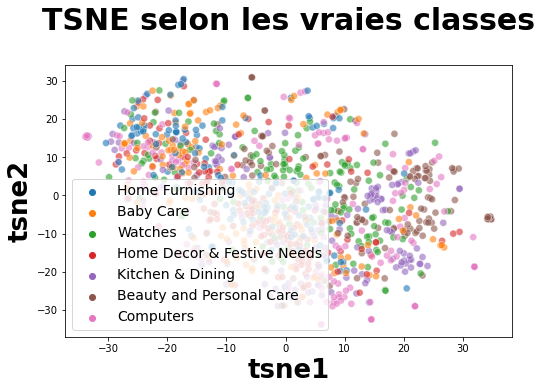

In [105]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [106]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne_sift)
#cls.fit(im_features_sift)
#cls.fit(feat_pca)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1050, 4)


In [107]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score

labels = data_flpk["category_tree_level_0"]
ARI = adjusted_rand_score(labels, cls.labels_)
db_score = davies_bouldin_score(X_tsne_sift, cls.labels_)
print(f"DB score = {db_score} --- ARI = {ARI}")

DB score = 0.9068049524431611 --- ARI = 0.043211292599075316


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.04 reste faible

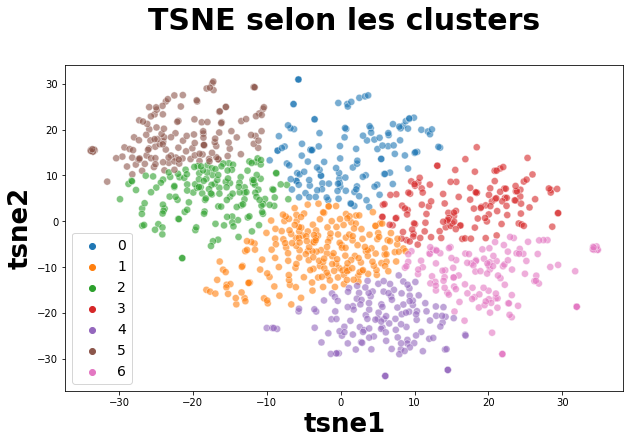

In [108]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

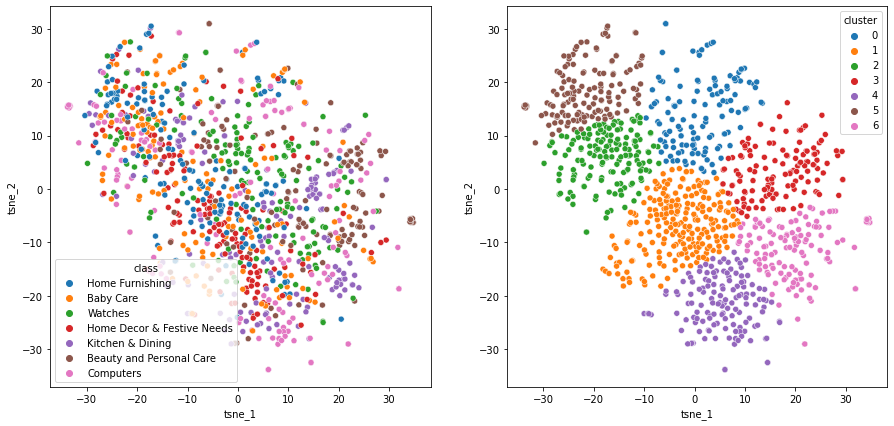

In [109]:
# Plot des samples dans t-SNE plot
df_tsne['tsne_1'] = X_tsne_sift[:, 0]
df_tsne['tsne_2'] = X_tsne_sift[:, 1]
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='class',
                       palette='tab10',
                       data=df_tsne,
                       legend="full")
#plt.xlim([-100, 60])
#plt.ylim([-60, 100])
plt.subplot(1, 2, 2)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='cluster',
                       palette='tab10',
                       data=df_tsne,
                       legend="full")
#plt.xlim([-100, 60])
#plt.ylim([-60, 100])
plt.savefig("sift_tsne.png", bbox_inches="tight")
plt.show()

# Descripteurs ORB

## Détermination et affichage des descripteurs

* L'image la plus petite contient 500 descripteurs
* Chaque descripteur est un vecteur de longueur 32

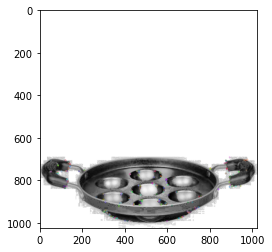

Descripteurs :  (500, 32)

[[125  91 249 ... 243  88  83]
 [ 72 177 184 ...   6 135 115]
 [223 191 234 ... 253 237 214]
 ...
 [ 22  57 182 ... 102 167 215]
 [ 70  93 151 ... 115  33  59]
 [ 35  66 227 ... 250 112 253]]


In [37]:
import cv2

orb = cv2.ORB_create()
image = cv2.imread(path+list_photos[min_height[0]], 0) # convert in gray
image = resize_pad(image, 1024)
#image = cv2.equalizeHist(image)   # equalize image histogram
clahe = cv2.createCLAHE()          # Equalization by CLAHE
image = clahe.apply(image)
kp, des = orb.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

## Pré-traitement des images via ORB

### Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("orb_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("orb_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [38]:
# identification of key points and associated descriptors
import time, cv2
orb_keypoints = []
temps1=time.time()
orb = cv2.ORB_create()
clahe = cv2.createCLAHE()

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    image = resize_pad(image, 1024)
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #res = cv2.equalizeHist(image)   # equalize image histogram
    res = clahe.apply(image)
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints, dtype='object')
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (524479, 32)
temps de traitement ORB descriptor :            74.05 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [39]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(orb_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k,
                                 batch_size=2000, random_state=0)
kmeans.fit(orb_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  724
Création de 724 clusters de descripteurs ...
temps de traitement kmeans :            46.91 secondes


## Création des features des images

In [40]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features_orb = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             4.93 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [110]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features_orb.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features_orb)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 724)
Dimensions dataset après réduction PCA :  (1050, 599)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [111]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30,
                     random_state=6)
X_tsne_orb = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne_orb[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_flpk["category_tree_level_0"]
print(df_tsne.shape)


(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images

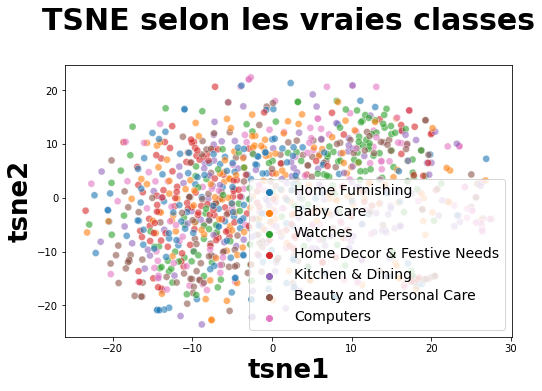

In [112]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [113]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne_orb)
#cls.fit(im_features_orb)
#cls.fit(feat_pca)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1050, 4)


In [114]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score

labels = data_flpk["category_tree_level_0"]
ARI = adjusted_rand_score(labels, cls.labels_)
db_score = davies_bouldin_score(X_tsne_orb, cls.labels_)
print(f"DB score = {db_score} --- ARI = {ARI}")

DB score = 0.8506933158099994 --- ARI = 0.02012761363770206


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.02 reste faible

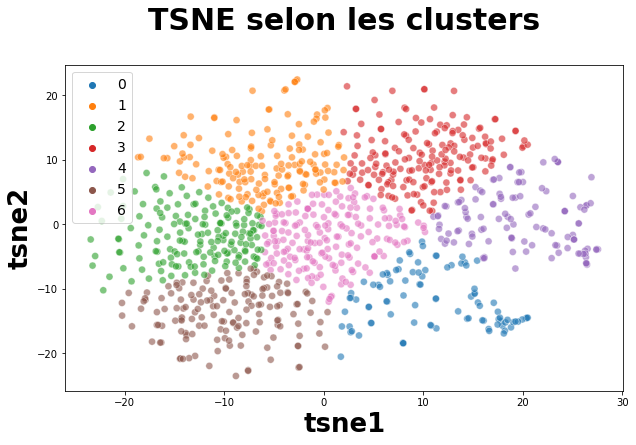

In [115]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

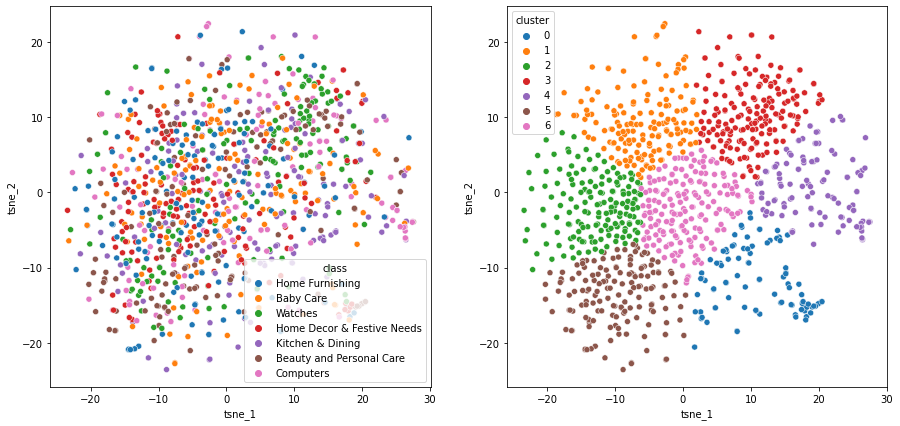

In [116]:
# Plot des samples dans t-SNE plot
df_tsne['tsne_1'] = X_tsne_orb[:, 0]
df_tsne['tsne_2'] = X_tsne_orb[:, 1]
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='class',
                       palette='tab10',
                       data=df_tsne,
                       legend="full")
#plt.xlim([-100, 60])
#plt.ylim([-60, 100])
plt.subplot(1, 2, 2)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='cluster',
                       palette='tab10',
                       data=df_tsne,
                       legend="full")
#plt.xlim([-100, 60])
#plt.ylim([-60, 100])
plt.savefig("orb_tsne.png", bbox_inches="tight")
plt.show()

# CNN Transformer

In [68]:
chunk = pd.read_csv('cnn_transformer_1.csv', chunksize=1000000)
img_features_cnn = pd.concat(chunk)
img_features_cnn.shape

(204800, 1050)

In [69]:
img_features_cnn = img_features_cnn.T

In [70]:
# Réduction de dimension par t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20, random_state=5)
X_tsne_cnn = tsne.fit_transform(img_features_cnn) 

In [71]:
# Clustering KMeans
from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters=7, random_state=5)
kmodel.fit(X_tsne_cnn)
data_kmcnn = data_flpk.copy()
data_kmcnn['kmeans_labels'] = kmodel.labels_

In [72]:
# Calcul d'ARI et DBScore
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score

ARI = adjusted_rand_score(data_flpk['category_tree_level_0'],
                          data_kmcnn['kmeans_labels'])
db_score = davies_bouldin_score(X_tsne_cnn, data_kmcnn['kmeans_labels'])
print(f"DBscore = {db_score} ---- ARI = {ARI}")

DBscore = 0.7208225952194692 ---- ARI = 0.4934577836238182


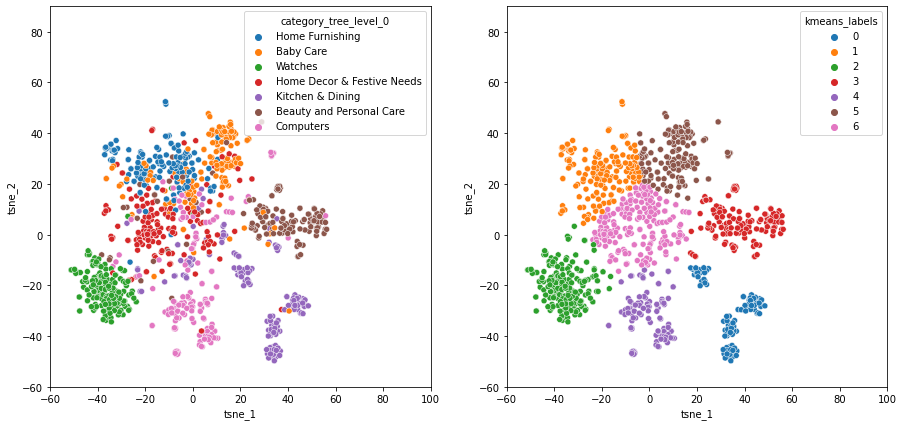

In [122]:
# Plot des samples dans t-SNE plot
data_kmcnn['tsne_1'] = X_tsne_cnn[:, 0]
data_kmcnn['tsne_2'] = X_tsne_cnn[:, 1]
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='category_tree_level_0',
                       palette='tab10',
                       data=data_kmcnn,
                       legend="full")
plt.xlim([-60, 100])
plt.ylim([-60, 90])
plt.subplot(1, 2, 2)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='kmeans_labels',
                       palette='tab10',
                       data=data_kmcnn,
                       legend="full")
plt.xlim([-60, 100])
plt.ylim([-60, 90])
plt.savefig("cnn_tsne.png", bbox_inches="tight")
plt.show()

# Regroupement Features Text + Features Images

In [123]:
# Regroupement des features text possible
features_text_1 = pd.DataFrame(tsne_results_bow) # BOW
features_text_2 = pd.DataFrame(tsne_results_w2v) # Word Embeding
features_text_3 = pd.DataFrame(lda_results) # Topic Modelling
features_text_4 = pd.DataFrame(tsne_results_use) # USE
dic_features_text = {'BOW': features_text_1,
                     'Word Embeding': features_text_2,
                     'Topic modelling (LDA)': features_text_3,
                     'USE': features_text_4}

In [124]:
# Regroupement des features images possibles
features_images_1 = pd.DataFrame(X_tsne_sift[:,0:2], columns=['tsne1', 'tsne2'])  # SIFT
features_images_2 = pd.DataFrame(X_tsne_orb[:,0:2], columns=['tsne1', 'tsne2'])   # ORB
features_images_3 = pd.DataFrame(X_tsne_cnn[:,0:2], columns=['tsne1', 'tsne2'])   # CNN Transformer Xception

dic_features_images = {'SIFT': features_images_1, 
                       'ORB': features_images_2, 
                       'CNN_transformer': features_images_3}

In [125]:
for ktx, vtx in dic_features_text.items():
    for kim, vim in dic_features_images.items():
        features = pd.concat([vtx, vim], axis=1)
        from sklearn.cluster import KMeans

        kmodel = KMeans(n_clusters=7, random_state=5)
        kmodel.fit(features)
        data_kmfinal = data_flpk.copy()
        data_kmfinal['kmeans_labels'] = kmodel.labels_
        
        # Score ARI
        from sklearn.metrics import adjusted_rand_score
        from sklearn.metrics import davies_bouldin_score
        
        db_score = davies_bouldin_score(features, data_kmfinal['kmeans_labels'])
        ARI = adjusted_rand_score(data_flpk['category_tree_level_0'],
                                  data_kmfinal['kmeans_labels'])
        print(f"{ktx} / {kim} ------- DBscore = {db_score} ----- ARI = {ARI}")

BOW / SIFT ------- DBscore = 1.1193286552021855 ----- ARI = 0.5254552122780514
BOW / ORB ------- DBscore = 1.0717058494013438 ----- ARI = 0.5692604198014237
BOW / CNN_transformer ------- DBscore = 0.8030446640064641 ----- ARI = 0.6243130155323354
Word Embeding / SIFT ------- DBscore = 1.1078820896292274 ----- ARI = 0.49351347056779793
Word Embeding / ORB ------- DBscore = 1.075459721440865 ----- ARI = 0.640302719561353
Word Embeding / CNN_transformer ------- DBscore = 0.7884511983131474 ----- ARI = 0.5522256809125841
Topic modelling (LDA) / SIFT ------- DBscore = 0.9105079186461758 ----- ARI = 0.04446049923503686
Topic modelling (LDA) / ORB ------- DBscore = 0.8586134867004704 ----- ARI = 0.020583349270633156
Topic modelling (LDA) / CNN_transformer ------- DBscore = 0.7220017356347525 ----- ARI = 0.4934577836238182
USE / SIFT ------- DBscore = 1.2654165354644036 ----- ARI = 0.4938772780410475
USE / ORB ------- DBscore = 1.1139914185856783 ----- ARI = 0.6060224231652428
USE / CNN_transf

In [126]:
# Baseline pour ARI - DummyClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import adjusted_rand_score

base = DummyClassifier(strategy='uniform')
ytrue = data_flpk['category_tree_level_0']
dic_base_text = {'BOW': 0,
                 'Word Embeding': 0,
                 'Topic modelling (LDA)': 0,
                 'USE': 0}
dic_base_img = {'SIFT': 0,
                 'ORB': 0,
                 'CNN_transformer': 0}
dic_base_all = {'BOW + SIFT': 0, 'BOW + ORB': 0, 'BOW + CNN_transformer': 0,
                 'Word Embeding + SIFT': 0, 'Word Embeding + ORB': 0,
                'Word Embeding + CNN_transformer': 0,
                 'Topic modelling (LDA) + SIFT': 0, 'Topic modelling (LDA) + ORB': 0,
                'Topic modelling (LDA) + CNN_transformer': 0,
                 'USE + SIFT': 0, 'USE + ORB': 0, 'USE + CNN_transformer': 0}

# Base features text
for ktx, vtx in dic_features_text.items():
    base.fit(vtx, ytrue)
    ypred = base.predict(vtx)
    ARI = adjusted_rand_score(ytrue, ypred)
    dic_base_text[ktx] = ARI

# Base features images
for kim, vim in dic_features_images.items():
    base.fit(vim, ytrue)
    ypred = base.predict(vim)
    ARI = adjusted_rand_score(ytrue, ypred)
    dic_base_img[kim] = ARI
    
# Base features text + images
for ktx, vtx in dic_features_text.items():
    for kim, vim in dic_features_images.items():
        features = pd.concat([vtx, vim], axis=1)
        base.fit(features, ytrue)
        ypred = base.predict(features)
        ARI = adjusted_rand_score(ytrue, ypred)
        dic_base_all[ktx+' + '+kim] = ARI

In [127]:
# Baseline
display(dic_base_text, dic_base_img, dic_base_all)

{'BOW': 0.001808910353127792,
 'Word Embeding': 5.892791241977462e-06,
 'Topic modelling (LDA)': -0.0007311708824013532,
 'USE': -0.0008959565053017573}

{'SIFT': -0.001823422682766757,
 'ORB': 0.0001139405216754194,
 'CNN_transformer': 0.00046290904111533646}

{'BOW + SIFT': -0.0009281488550274129,
 'BOW + ORB': -0.0006132727353969534,
 'BOW + CNN_transformer': 0.0011093735891988031,
 'Word Embeding + SIFT': 0.0003004163148006838,
 'Word Embeding + ORB': 0.00014557634093704028,
 'Word Embeding + CNN_transformer': -0.0004799291945964763,
 'Topic modelling (LDA) + SIFT': -0.0006435271537820152,
 'Topic modelling (LDA) + ORB': 0.0010883014246023787,
 'Topic modelling (LDA) + CNN_transformer': -0.0009387880000019866,
 'USE + SIFT': 0.0017537781074195896,
 'USE + ORB': 0.001410288051334485,
 'USE + CNN_transformer': 0.0007080862674656269}